Question: Does age affect the ride duration for Citi Bike trips taken in January, 2016?

Alternative hypothesis: There is a negative correlation between age of riders and trip duration,
    with a .05 confidence level.
    
Null hypothesis: Age and trip duration are inversely related at less than a .05 confidence interval
    OR there is no apparent relationship
    OR there is a positive relationship.

In [3]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json
import seaborn

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
get_ipython().system("curl -O 'https://s3.amazonaws.com/tripdata/201601-citibike-tripdata.zip'")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16.9M  100 16.9M    0     0  28.5M      0 --:--:-- --:--:-- --:--:-- 37.8M


In [ ]:
# get_ipython().system('unzip 201601-citibike-tripdata.zip')

In [3]:
df = pd.read_csv('201601-citibike-tripdata.csv')

In [4]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1


In [5]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [6]:
df.drop([u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'gender'], axis=1, inplace=True)

In [35]:
df.head()
# gender 1 is male, 2 is female

,tripduration,birth year,age
0,923,1958.0,58.0
1,379,1969.0,47.0
2,589,1982.0,34.0
3,889,1961.0,55.0
4,1480,1952.0,64.0


In [33]:
#dropping NaN
df['age'].dropna(inplace= True)
df['tripduration'].dropna(inplace= True)

df['age'] = 2016 - df['birth year']
x = df['age']
y = df['tripduration']

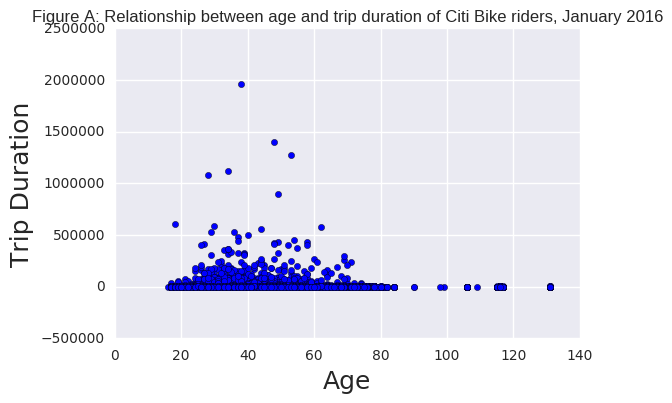

In [128]:
pl.scatter(x, y)

pl.xlabel('Age', fontsize = 18)
pl.ylabel('Trip Duration', fontsize = 18)
pl.title('Figure A: Relationship between age and trip duration of Citi Bike riders, January 2016')

I'm trying it next as a histogram instead of a scatter plot to see how it looks.

In [18]:
pl.hist([x, y], bins=np.arange(min(df), max(df) + 5, 5))

pl.xlabel('Age', fontsize = 18)
pl.ylabel('Trip Duration', fontsize = 18)

TypeError: float() argument must be a string or a number

In [34]:
scipy.stats.pearsonr(x, y)

(nan, 1.0)

In [36]:
len(x)

509478

In [37]:
len(y)

509478

In [46]:
array1 = x.dropna().values
len(array1)

484933

In [47]:
array2 = y.dropna().values
len(array2)

509478

In [51]:
array3 = np.random.choice(array2, 484933, replace = False)
len(array3)

484933

In [52]:
array1 = sorted(array1, key=int)

In [54]:
array3 = sorted(array3, key=int)

In [58]:
correlation = scipy.stats.pearsonr(array1, array3)
print (correlation)

(0.2004714664352909, 0.0)


# We cannot reject the null hypothesis. The Pearson test showed a correlation coefficient of .2 with a p-value of 0, meaning we can be 100% confident that the two variables have a slight positive correlation. As age goes up, so does trip duration.

The following four steps, an attempt to download data to PUIDATA, do not work. Did it locally instead. Will need to look into this later.

In [1]:
# os.getenv("curl -O https://s3.amazonaws.com/tripdata/201507-citibike-tripdata.zip")

curl -O https://s3.amazonaws.com/tripdata/201507-citibike-tripdata.zip


In [4]:
print("mv " + "201507-citibike-tripdata.zip " + os.getenv("PUIDATA"))

mv 201507-citibike-tripdata.zip /home/cusp/akd361/PUIdata


In [96]:
# os.getenv("unzip" + os.getenv("PUIDATA") + "/201507-citibike-tripdata.zip")

In [102]:
# df2 = pd.read_csv('201507-citibike-tripdata.csv')
# df2.head()

In [98]:
get_ipython().system("curl -O 'https://s3.amazonaws.com/tripdata/201507-citibike-tripdata.zip'")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 32.9M  100 32.9M    0     0  26.6M      0  0:00:01  0:00:01 --:--:-- 31.0M


In [100]:
get_ipython().system('unzip 201507-citibike-tripdata.zip')

Archive:  201507-citibike-tripdata.zip
  inflating: 201507-citibike-tripdata.csv  


In [101]:
df2 = pd.read_csv('201507-citibike-tripdata.csv')
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992.0,1
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990.0,1
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988.0,1


In [105]:
df2.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [107]:
df2.drop([u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'gender'], axis=1, inplace=True)

In [108]:
df2.head()

,tripduration,birth year
0,732,1970.0
1,322,1984.0
2,790,1992.0
3,1228,1990.0
4,1383,1988.0


In [110]:
df2['age'] = 2015 - df2['birth year']
df2['age'].dropna(inplace= True)
df2['tripduration'].dropna(inplace= True)

x2 = df2['age']
y2 = df2['tripduration']

In [114]:
len(x2)

905311

In [115]:
len(y2)

1085676

In [118]:
arrayx2 = x2.dropna().values
arrayy2 = y2.dropna().values

In [119]:
len(arrayx2)

905311

In [120]:
len(arrayy2)

1085676

In [121]:
array4 = np.random.choice(arrayy2, 905311, replace = False)
len(array4)

905311

In [122]:
arrayx2 = sorted(arrayx2, key=int)
array4 = sorted(array4, key=int)

In [125]:
correlation = scipy.stats.pearsonr(arrayx2, array4)
print (correlation)

(0.14407973720036865, 0.0)


# These results back up those we got from the first sample. We have a correlation coefficient of .144 (similar to .2) and again, a p-value of 0. For Citi Bike riders in both January and July, age and trip duration have a slight positive correlation. The relationship is slightly weaker in the July 2015 data. The Null stands.